In [11]:
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import numpy as np

In [4]:
# LOad BOW and TF-IDF feature marices and labels
X_bow = os.path.join('..', 'data', 'X_bow_all.pkl')
X_tfidf = os.path.join('..', 'data', 'X_tfidf_all.pkl')
y = os.path.join('..', 'data', 'y_all.pkl')

X_bow = joblib.load('../data/X_bow_all.pkl')
X_tfidf = joblib.load('../data/X_tfidf_all.pkl')
y = joblib.load('../data/y_all.pkl')

In [5]:
# Split fow BOW

X_bow_train, X_bow_test, y_bow_train, y_bow_test = train_test_split(
    X_bow, y, test_size=0.2, stratify=y, random_state=1311
)

In [6]:
# Split for TF-IDF

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf, y, test_size=0.2, stratify=y, random_state=1311)

In [7]:
# Train Logistic Regression (BoW)
bow_model = LogisticRegression(max_iter=1000)
bow_model.fit(X_bow_train, y_bow_train)

LogisticRegression(max_iter=1000)

In [8]:
# Evaluation
y_bow_pred = bow_model.predict(X_bow_test)
print("=== BoW Model ===")
print("Accuracy:", accuracy_score(y_bow_test, y_bow_pred))
print(classification_report(y_bow_test, y_bow_pred))

=== BoW Model ===
Accuracy: 0.8548071548351034
              precision    recall  f1-score   support

    negative       0.72      0.63      0.67     11413
     neutral       0.42      0.16      0.23      5951
    positive       0.89      0.96      0.93     61352

    accuracy                           0.85     78716
   macro avg       0.68      0.58      0.61     78716
weighted avg       0.83      0.85      0.84     78716



In [9]:
# Train Logistic Regression (TF-IDF) 
tfidf_model = LogisticRegression(max_iter=1000)
tfidf_model.fit(X_tfidf_train, y_tfidf_train)

LogisticRegression(max_iter=1000)

In [10]:
# Evaluation
y_tfidf_pred = tfidf_model.predict(X_tfidf_test)
print("=== TF-IDF Model ===")
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_pred))
print(classification_report(y_tfidf_test, y_tfidf_pred))

=== TF-IDF Model ===
Accuracy: 0.8602952385791961
              precision    recall  f1-score   support

    negative       0.73      0.65      0.69     11413
     neutral       0.47      0.15      0.23      5951
    positive       0.89      0.97      0.93     61352

    accuracy                           0.86     78716
   macro avg       0.70      0.59      0.62     78716
weighted avg       0.84      0.86      0.84     78716



In [16]:
# Class labels and F1 scores for each model
labels = ['Negative', 'Neutral', 'Positive']
bow_f1 = [0.67, 0.23, 0.93]
tfidf_f1 = [0.69, 0.23, 0.93]

# Set position of bars on X axis
x = np.arange(len(labels))
width = 0.35  # Width of each bar

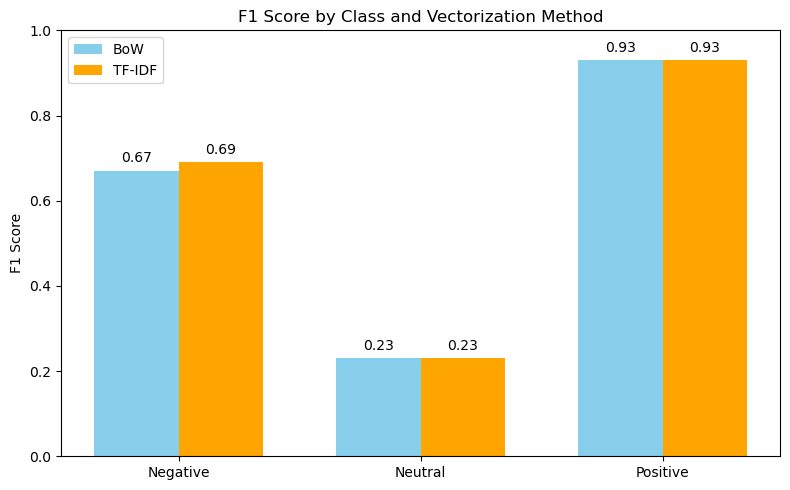

In [17]:
# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, bow_f1, width, label='BoW', color='skyblue')
plt.bar(x + width/2, tfidf_f1, width, label='TF-IDF', color='orange')

# Add labels and title
plt.ylabel('F1 Score')
plt.title('F1 Score by Class and Vectorization Method')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()

# Add numerical labels above each bar
for i in range(len(labels)):
    plt.text(x[i] - width/2, bow_f1[i] + 0.02, f'{bow_f1[i]:.2f}', ha='center')
    plt.text(x[i] + width/2, tfidf_f1[i] + 0.02, f'{tfidf_f1[i]:.2f}', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# ------------------ Save Models ------------------
joblib.dump(bow_model, '../models/logreg_bow.pkl')
joblib.dump(tfidf_model, '../models/logreg_tfidf.pkl')